<img src="https://i.ibb.co/K5n24Nd/1.png"  alt="KCode Banner alpha"  />

<a href="https://www.linkedin.com/in/kauebr/"><img src="https://cdn-icons-png.flaticon.com/512/174/174857.png" width="30" ></a> <a href="mailto: kauemandarino@gmail.com"><img src="https://cdn-icons-png.flaticon.com/512/5968/5968534.png" width="30" ></a><a href="
https://api.whatsapp.com/send?phone=5541991835800&text=Oi"> <img src="https://imagepng.org/wp-content/uploads/2017/08/whatsapp-icone-1.png" width="30" ></a><a href="https://github.com/kauebr/"><img src="https://github.githubassets.com/images/modules/logos_page/Octocat.png" width="30" ></a>


# Análise exploratório de dados

## Metodologia / Passos:
*  Fazer em excel um dataframe com as intereseccoes das datas e puxar `ok`
* Fazer um dataframe com todos os valores das ações das empresas empresas no periodo `ok`
* Tirar a média `ok`
* Calcular a variação  `ok`
* Criar um outro dataframe com a tx Selic `ok`
* Calcular a variação  `ok`
* Validar os dados
* Fazer a análise exploratória 
    Validar ou não, a hipótese de que é mais vantajoso investir em ações do setor siderúrgico do que do que no tesouro direto (LFT)

In [1]:
# Importando libs
import pandas as pd
from random import randint
from datetime import date
import matplotlib.pyplot as plt

In [2]:
# Definido funções para apresentação visual(str) dos resultados
def linha():
    print(33*'-')
def tit():
    linha()
    print(f"{titulo : ^33}")
    linha()
    print('Rendimento:')
def título():
    linha()
    print(f"{titulo : ^33}")
    linha()

# Criando o nossa série temporal

In [3]:
# Puxando os dados
dir = 'C:/Users/manda/OneDrive/Documents/GitHub/Insights/Setor Siderúrgico Nacional/2 Entrega - Cliclo 2/Passo 03 e 04 - Coleta e limpeza dos dados/DataFrames/DF pronto para análise pandas.csv'
df = pd.read_csv(dir, skiprows=1, encoding='UTF8')
# Dropando coluna desnecessária
df = df.drop(columns=['Unnamed: 0'])
df.head(3)

,Data,Vale,Gerdau Pref,Gerdau Met Pref,CSN,Usiminas,Selic
0,1/31/2000,1.951422,268.362579,0.219444,1.667136,1.731119,1.46
1,2/29/2000,1.658708,263.639343,0.231984,1.566680,1.566250,1.45
2,3/31/2000,1.626185,244.209869,0.200635,1.754768,1.426112,1.45


# Aqui foi interessante, pois eu encontrei um erro:
Gerdau preferêncial e Gerdau Met preferêncial, não são empresas diferentes, são apenas
tipos de ações diferentes(Ordinárias/Preferências, sem direito a voto/com direito a voto)
Vamos remover as ações ordinárias de nosso estudo.

In [4]:
df.drop(columns=['Gerdau Pref'], inplace=True)
df = df.rename(columns={'Gerdau Met Pref': 'Gerdau'})
df.head(3)

,Data,Vale,Gerdau,CSN,Usiminas,Selic
0,1/31/2000,1.951422,0.219444,1.667136,1.731119,1.46
1,2/29/2000,1.658708,0.231984,1.566680,1.566250,1.45
2,3/31/2000,1.626185,0.200635,1.754768,1.426112,1.45


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Data      263 non-null    object 
 1   Vale      263 non-null    float64
 2   Gerdau    263 non-null    float64
 3   CSN       263 non-null    float64
 4   Usiminas  263 non-null    float64
 5   Selic     263 non-null    float64
dtypes: float64(5), object(1)
memory usage: 12.5+ KB


## A data esta no formato str, vamos corrigir:

In [6]:
# Transformando a coluna 'Data' em 'TimeStamp'
df['Data']= pd.to_datetime(df['Data'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Data      263 non-null    datetime64[ns]
 1   Vale      263 non-null    float64       
 2   Gerdau    263 non-null    float64       
 3   CSN       263 non-null    float64       
 4   Usiminas  263 non-null    float64       
 5   Selic     263 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 12.5 KB


In [8]:
# Transformando a coluna 'Data' em DateTimeIndex
index = pd.DatetimeIndex(df['Data'])
df.set_index('Data', inplace=True)
df.head(3)

,Vale,Gerdau,CSN,Usiminas,Selic
Data,,,,,
2000-01-31,1.951422,0.219444,1.667136,1.731119,1.46
2000-02-29,1.658708,0.231984,1.566680,1.566250,1.45
2000-03-31,1.626185,0.200635,1.754768,1.426112,1.45


## Agora antes de tirar a média entre as 4 vamos verificar se existem séries outliers gritantes.

<AxesSubplot:xlabel='Data'>

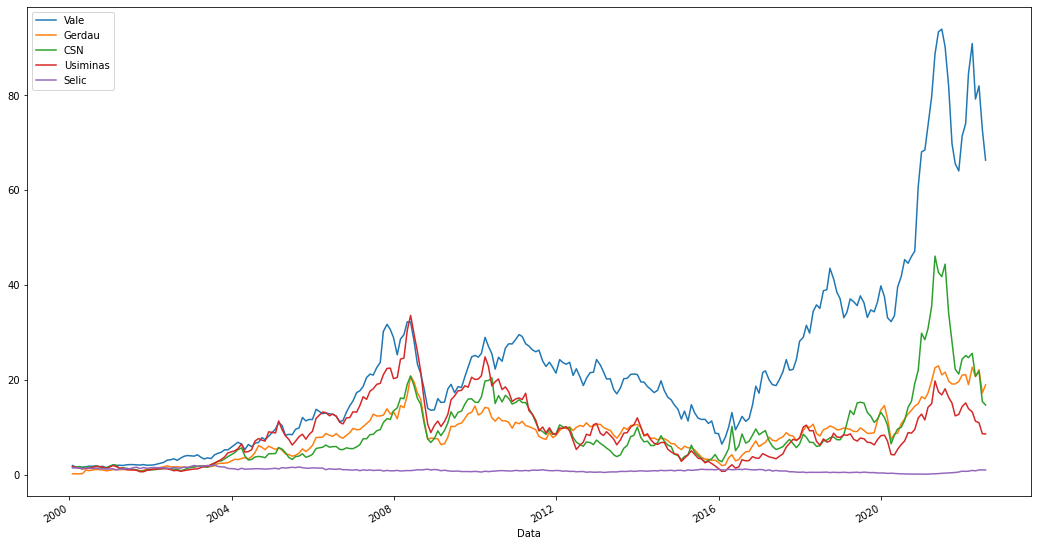

In [9]:
df.plot(figsize=(18, 10))


## Diminuindo o intervalo temporal
   Decidi pela remoção dos dados mais antigos, pois não aparentam ser dados de alta confiabilidade, são dados muito antigos, e as fontes dão indicativos de serem normalizados.

# Então vamos remover este periodo não confiável.

<AxesSubplot:xlabel='Data'>

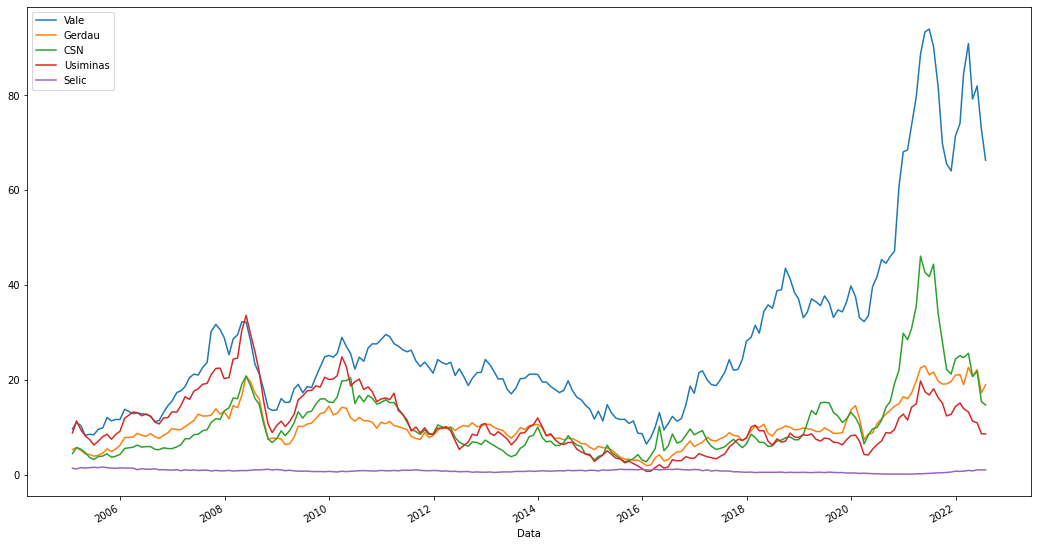

In [10]:
# Removendo o periodo:
# df = df[(df_var.index >= data_inicial) & (df_var <= data_atual)]
df = df[df.index >= '01-01-2005']
df.plot(figsize=(18,10))

# Modelando nossos dados

In [11]:
# Inserindo uma coluna com a média do valor das ações
df['Média ações'] = ((df['Vale'] + df['Gerdau'] + df['CSN'] +df['Usiminas'])/4)
df.head(3)

C:\Users\manda\AppData\Local\Temp\ipykernel_16832\3883830032.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Média ações'] = ((df['Vale'] + df['Gerdau'] + df['CSN'] +df['Usiminas'])/4)


,Vale,Gerdau,CSN,Usiminas,Selic,Média ações
Data,,,,,,
2005-01-31,9.659540,5.327970,4.479893,8.820462,1.38,7.071966
2005-02-28,11.037731,5.712520,5.745207,11.359438,1.22,8.463724
2005-03-31,10.366929,5.169133,5.411780,9.479932,1.53,7.606944


## Calculando a variância percentual
 * Como estamos trabalhando com duas medidas diferentes: `Valor das ações`, e `% da Selic`, temos que padronizar estes valores para podemos analisá-los

In [12]:
# Reduzindo o dataframe
df_filtrado = df[['Média ações', 'Selic']]
df_filtrado.head(3)

,Média ações,Selic
Data,,
2005-01-31,7.071966,1.38
2005-02-28,8.463724,1.22
2005-03-31,7.606944,1.53


In [13]:
# Cálculando variação percentual
df_filtrado.insert(loc = 1, column = 'Δ% Ações', value = round(df_filtrado['Média ações'].pct_change()*100, 2))
df_filtrado.insert(loc = 3, column = 'Δ% Selic', value = round(df_filtrado['Selic'].pct_change()*100, 2))

<AxesSubplot:xlabel='Data'>

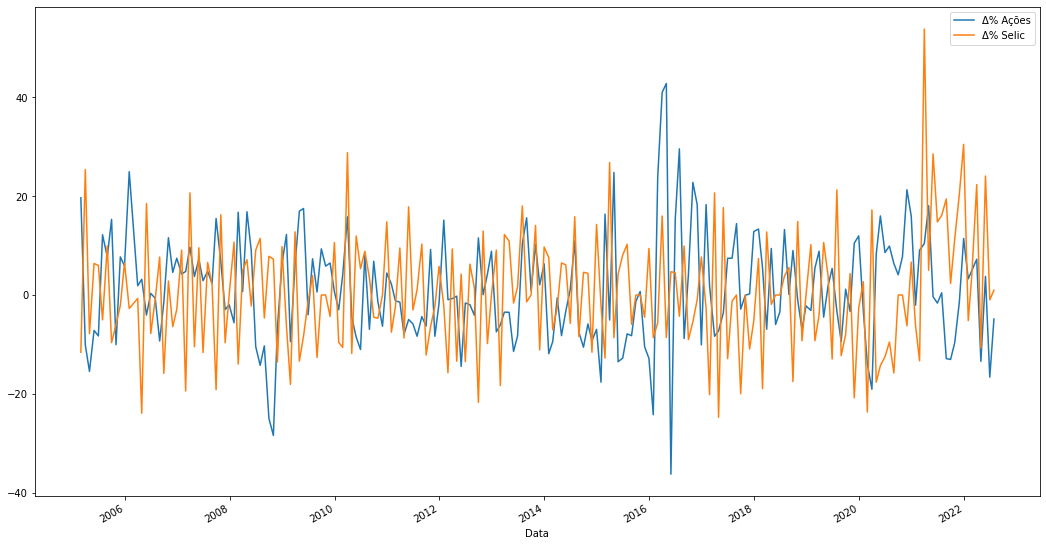

In [14]:
# Criando um data frame só com as variáveis

df_var = df_filtrado[['Δ% Ações', 'Δ% Selic']]
df_var.plot(figsize=(18,10))

# O gráfico acima é apenas para visualizar se o data frame foi criado de maneira correta, sendo necessário ainda agrupar os valores para a análise exploratória
> Os dados estão tipados e estruturados, agora, antes da análise de fato, vamos revalidá-los

# Revalidação dos dados

A seguir vou revalidar os dados, para conferir se eles ainda estão
consistentes, e não se corromperam em algum momento do processo.  
Lembrando que eles já foram validados anteriormente.  
Itens a serem válidados: 
* 3 Valores Selic aleatórios `ok`
* 3 cotações aleatórias
* 1 variação

In [15]:
df.shape

(210, 6)

In [16]:
# Gerando fatores aleatórios para a verificação
rows = [randint(0,210), randint(0,210), randint(0,10)]

In [17]:
# Puxando valores para conferência
linha()
print("Conferência Selic".center(33))
for row in rows:
    linha()
    print(f"{df.index[row].date()} | {df['Selic'][row]}".center(33))
linha()

---------------------------------
        Conferência Selic        
---------------------------------
        2019-05-31 | 0.54        
---------------------------------
        2012-06-29 | 0.64        
---------------------------------
        2005-08-31 | 1.66        
---------------------------------


* Lembrando que cada vez que eu rodo o código, o fator aleatório de conferência muda,
foi conferido a primeira vez, conforme a tabela abaixo, e estava ok.

Dados extraídos de contabeis.com.br [Fonte]('https://www.contabeis.com.br/tabelas/selic/')  
<img src="https://i.ibb.co/jJ19bdQ/validacao.png"  alt="Validação"/> 
>Os dados da Selic estão consistentes

In [18]:
# Gerando novos fatores aleatórios para a verificação
# Dessa vez, eu comentei o código usado, e fixei os valores gerados aleatóriamente como strg,
# para não dar o mesmo erro acima.:

# linha()
# print('Ações à validar'.center(33))
# linha()
# colunas = [randint(1,5), randint(1,5), randint(1,5)]
# linhas = [randint(0,263), randint(0,263), randint(0,263)]
# for c in range (0,3):
#    print(f'Colunas: {colunas[c]} | Linha: {linhas[c]}'.center(33))
#linha()

print(
'''---------------------------------
         Ações à validar         
---------------------------------
      Colunas: 4 | Linha: 58     
     Colunas: 3 | Linha: 153     
      Colunas: 2 | Linha: 16     
---------------------------------''')

---------------------------------
         Ações à validar         
---------------------------------
      Colunas: 4 | Linha: 58     
     Colunas: 3 | Linha: 153     
      Colunas: 2 | Linha: 16     
---------------------------------


In [19]:
df.iloc[58]

Vale           25.171339
Gerdau         14.487892
CSN            15.318745
Usiminas       20.097769
Selic           0.730000
Média ações    18.768936
Name: 2009-12-30 00:00:00, dtype: float64

# Aqui foi interessante, pois eu encontrei um erro:
Gerdau preferêncial e Gerdau Met preferêncial, não são empresas diferentes, são apenas
tipos de ações diferentes(Ordinárias/Preferências, sem direito a voto/com direito a voto)
Vamos remover as ações ordinárias de nosso estudo.
Retirei esse trecho do código que minerava os dados:  

* Estavamos trabalhando com este dado desde o começo, então isto mostra o quanto a validação/revalidação constante dos dados é importante.

# Análise exploratória dos dados:

## Metodologia
* Nesta etapa vamos utilizar os dados para validar a nossa hipótese. 

Hipotése: Investir em ações do setor siderúrgico nacional compensa.

O que é compensar?, para responder esta pergunta nesta etapa, vamos comparar o rendimento das ações com o investimento risco zero(SELIC),  
se o rendimento das ações for significantemente maior que o da SELIC, significará que compensa o risco; Se o rendimento das açõe for menor   
ou próximo ao rendimento da SELIC, não compensa o risco. Neste caso seria melhor fazer este aporte no tesouro direto(SELIC) que o risco é zero,  
ou em algum outro investimento mais lucrativo. 


In [20]:
# Abaixo vamos plotar um gráfico muito importante para nossa análise, vamos agrupar a soma das variações por ano.
df_var.reset_index().groupby(pd.Grouper(key='Data', freq='Y')).sum().plot(figsize=(18,10), title='Evolução Anual das Variações das Ações e Selic')

Como podemos notar acima, não houve uma grande diferença entre um indicador e outro no geral, tendo inclusive nos dois últimos anos a Selic tido um rendimento   
maior que a média das ações. Estes dois fatos são indicadores que nossa hipótese é invalida.
Abaixo vamos destrinchar melhor estes dados:

* Calcular no final a vale que teve um rendimento acima da média. * AAA

In [ ]:
titulo = 'Periodo todo(16a.)'

# Calculando as variações:
acoes = df_var['Δ% Ações'].sum()
selic = df_var['Δ% Selic'].sum()
maior = 'Ações' if max(acoes, selic) == acoes else 'Selic' 
diferenca = max(acoes, selic) - min(acoes, selic)

# Armazendo os resultados em um dicionário 
vp22a = {'Ações' : acoes, 'Selic': selic, 'Maior' : maior, 'diferença': diferenca}

# Exibindo resultados
tit()
print(f"Δ% Ações: {acoes : >23.2f}")
print(f"Δ% Selic: {selic : >23.2f}")
linha()
print(f"{maior} renderam  {diferenca : .2f}% a mais")
linha()

De cara já vemos que que no período total as ações renderam mais que o dobro do que a selic  
Agora vamos ver nos períodos mais proximos

In [ ]:
# Filtrando o periodo:
titulo = '10 anos'
data_atual = '2022-07-29' 
data_inicial = '2012-07-29'
df_filtrado = df_var[(df_var.index >= data_inicial) & (df_var.index <= data_atual)]


df_filtrado
#df_filtrado = df_var[(df_var['Data'] >= data_inicial) & (df_var['Data'] <= data_atual)]

In [ ]:
# Filtrando o periodo:
titulo = '10 anos'
data_atual = '2022-07-29' 
data_inicial = '2012-07-29'
df_filtrado = df_var[(df_var.index >= data_inicial) & (df_var.index <= data_atual)]

# Calculando as variações:
acoes = df_filtrado['Δ% Ações'].sum()
selic = df_filtrado['Δ% Selic'].sum()
maior = 'Ações' if max(acoes, selic) == acoes else 'Selic' 
diferenca = max(acoes, selic) - min(acoes, selic)

# Armazendo os resultados em um dicionário 
vp10a = {'Ações' : acoes, 'Selic': selic, 'Maior' : maior, 'diferença': diferenca}

# Exibindo resultados
tit()
print(f"Δ% Ações: {acoes : >23.2f}")
print(f"Δ% Selic: {selic : >23.2f}")
linha()
print(f"{maior} renderam  {diferenca : .2f}% a mais")
linha()

In [ ]:
# Filtrando o periodo:
titulo = '5 anos'
data_atual = '2022-07-29' 
data_inicial = '2017-07-29'
df_filtrado = df_var[(df_var.index >= data_inicial) & (df_var.index <= data_atual)]

# Calculando as variações:
acoes = df_filtrado['Δ% Ações'].sum()
selic = df_filtrado['Δ% Selic'].sum()
maior = 'Ações' if max(acoes, selic) == acoes else 'Selic' 
diferenca = max(acoes, selic) - min(acoes, selic)

# Armazendo os resultados em um dicionário 
vp5a = {'Ações' : acoes, 'Selic': selic, 'Maior' : maior, 'diferença': diferenca}

# Exibindo resultados
tit()
print(f"Δ% Ações: {acoes : >23.2f}")
print(f"Δ% Selic: {selic : >23.2f}")
linha()
print(f"{maior} renderam  {diferenca : .2f}% a mais")
linha()

In [ ]:
# Filtrando o periodo:
titulo = '3 anos'
data_atual = '2022-07-29' 
data_inicial = '2019-07-29'
df_filtrado = df_var[(df_var.index >= data_inicial) & (df_var.index <= data_atual)]

# Calculando as variações:
acoes = df_filtrado['Δ% Ações'].sum()
selic = df_filtrado['Δ% Selic'].sum()
maior = 'Ações' if max(acoes, selic) == acoes else 'Selic' 
diferenca = max(acoes, selic) - min(acoes, selic)

# Armazendo os resultados em um dicionário 
vp3a = {'Ações' : acoes, 'Selic': selic, 'Maior' : maior, 'diferença': diferenca}

# Exibindo resultados
tit()
print(f"Δ% Ações: {acoes : >23.2f}")
print(f"Δ% Selic: {selic : >23.2f}")
linha()
print(f"{maior} renderam  {diferenca : .2f}% a mais")
linha()

In [ ]:
# Filtrando o periodo:
titulo = '2 anos'
data_atual = '2022-07-29' 
data_inicial = '2010-07-29'
df_filtrado = df_var[(df_var.index >= data_inicial) & (df_var.index <= data_atual)]

# Calculando as variações:
acoes = df_filtrado['Δ% Ações'].sum()
selic = df_filtrado['Δ% Selic'].sum()
maior = 'Ações' if max(acoes, selic) == acoes else 'Selic' 
diferenca = max(acoes, selic) - min(acoes, selic)

# Armazendo os resultados em um dicionário 
vp2a = {'Ações' : acoes, 'Selic': selic, 'Maior' : maior, 'diferença': diferenca}

# Exibindo resultados
tit()
print(f"Δ% Ações: {acoes : >23.2f}")
print(f"Δ% Selic: {selic : >23.2f}")
linha()
print(f"{maior} renderam  {diferenca : .2f}% a mais")
linha()

In [ ]:
# Filtrando o periodo:
titulo = '1 ano'
data_atual = '2022-07-29' 
data_inicial = '2010-07-29'
df_filtrado = df_var[(df_var.index >= data_inicial) & (df_var.index <= data_atual)]

# Calculando as variações:
acoes = df_filtrado['Δ% Ações'].sum()
selic = df_filtrado['Δ% Selic'].sum()
maior = 'Ações' if max(acoes, selic) == acoes else 'Selic' 
diferenca = max(acoes, selic) - min(acoes, selic)

# Armazendo os resultados em um dicionário 
vp1a = {'Ações' : acoes, 'Selic': selic, 'Maior' : maior, 'diferença': diferenca}

# Exibindo resultados
tit()
print(f"Δ% Ações: {acoes : >23.2f}")
print(f"Δ% Selic: {selic : >23.2f}")
linha()
print(f"{maior} renderam  {diferenca : .2f}% a mais")
linha()

In [ ]:
# Filtrando o periodo:
titulo = '3 meses'
data_atual = '2022-07-29' 
data_inicial = '2010-04-29'
df_filtrado = df_var[(df_var.index >= data_inicial) & (df_var.index <= data_atual)]

# Calculando as variações:
acoes = df_filtrado['Δ% Ações'].sum()
selic = df_filtrado['Δ% Selic'].sum()
maior = 'Ações' if max(acoes, selic) == acoes else 'Selic' 
diferenca = max(acoes, selic) - min(acoes, selic)

# Armazendo os resultados em um dicionário 
vp6m = {'Ações' : acoes, 'Selic': selic, 'Maior' : maior, 'diferença': diferenca}

# Exibindo resultados
tit()
print(f"Δ% Ações: {acoes : >23.2f}")
print(f"Δ% Selic: {selic : >23.2f}")
linha()
print(f"{maior} renderam  {diferenca : .2f}% a mais")
linha()

In [ ]:
#COLOCAR AQUI UMA MÉDIA FLUTUANTE
#IMPORTANTE VALIDAR ESSES DADOS 